In [1]:
import os
if '_cwd_set' not in locals(): locals()['_cwd_set'] = os.chdir(os.path.dirname(os.getcwd()))
import omnifig as fig
fig.initialize()
from src.jimports import *
from src.util import set_default_device, repo_root, data_root
from src.dataset import RawCOCO, SimpleCOCO, RawCOCOCaptions
from src.pretrained import ViT
device = set_default_device();

Selecting CUDA device 3 with 63486 MiB free memory and 100% utilization


In [2]:
path = Path('/data/felix/3dshapes/3dshapes.h5')
data = hf.File(path, 'r')

In [ ]:
data.keys()

<KeysViewHDF5 ['images', 'labels']>

In [4]:
data['images'].shape, data['labels'].shape

((480000, 64, 64, 3), (480000, 6))

In [5]:
labels = data['labels'][:]
labels.shape

(480000, 6)

In [6]:
labels.min(0), labels.max(0)

(array([  0.  ,   0.  ,   0.  ,   0.75,   0.  , -30.  ]),
 array([ 0.9 ,  0.9 ,  0.9 ,  1.25,  3.  , 30.  ]))

In [9]:
np.unique(labels[:,3])

array([0.75      , 0.82142857, 0.89285714, 0.96428571, 1.03571429,
       1.10714286, 1.17857143, 1.25      ])

In [7]:
outfile = Path('/data/felix/3dshapes/3dshapes-uncompressed.h5')
with hf.File(outfile, 'w') as f:
    f.create_dataset('images', data=data['images'][:])
    f.create_dataset('labels', data=labels)

In [8]:
df.mean()

0     5.060083
1     5.005323
2     5.010607
3     4.883794
4     5.020795
5     5.289815
6     4.743739
7     5.373509
8     5.084723
9     4.534303
10    4.697156
11    4.955255
12    5.056173
13    5.028984
14    5.048626
15    4.449591
16    4.977602
17    4.774143
18    5.512334
19    5.186747
dtype: float64

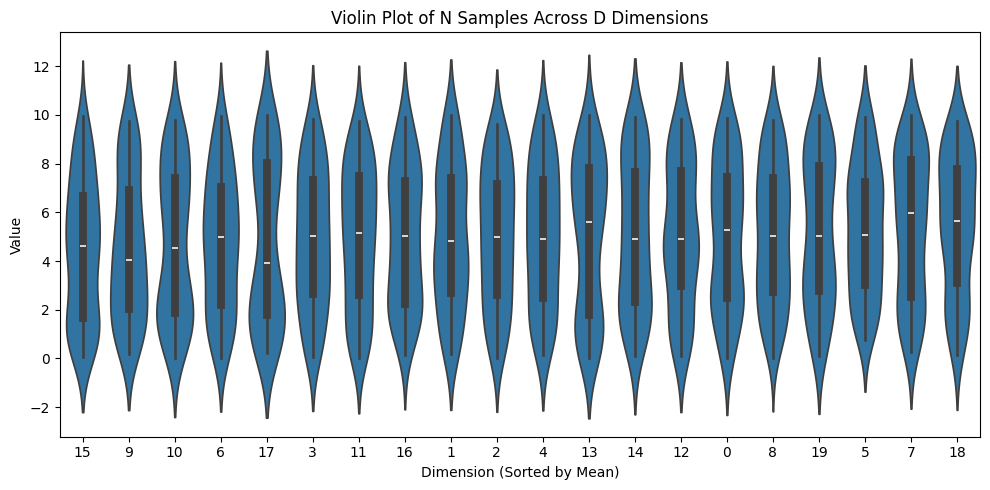

In [5]:
# import wandb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize W&B
# wandb.init(project="violin_plot_example")

# Generate random data: N samples for D dimensions
N = 100  # Number of samples
D = 20   # Number of dimensions
data = np.random.rand(N, D) * 10  # Random values between 0 and 10

# Convert to long-form for seaborn
df = pd.DataFrame(data, columns=[f"{i}" for i in range(D)])
df_long = df.melt(var_name="Dimension", value_name="Value")

# Calculate mean values for sorting
mean_values = df.mean().sort_values()
dimension_order = mean_values.index

# Plot violin plot
plt.figure(figsize=(10, 5))
# sns.violinplot(x="Dimension", y="Value", data=df_long, order=dimension_order, inner="quartile")
# same but with min and max
sns.violinplot(x="Dimension", y="Value", data=df_long, order=dimension_order, inner="box")

# Adjust plot for compactness
plt.xticks()
plt.xlabel("Dimension (Sorted by Mean)")
plt.ylabel("Value")
plt.title("Violin Plot of N Samples Across D Dimensions")
plt.tight_layout()

# Log the plot to W&B
# wandb.log({"violin_plot": wandb.Image(plt)})

# wandb.finish()


In [16]:
# Generate random data: N samples for D dimensions
N = 20  # Number of samples
D = 10   # Number of dimensions
data = np.random.rand(N, D) * 10  # Random values between 0 and 10


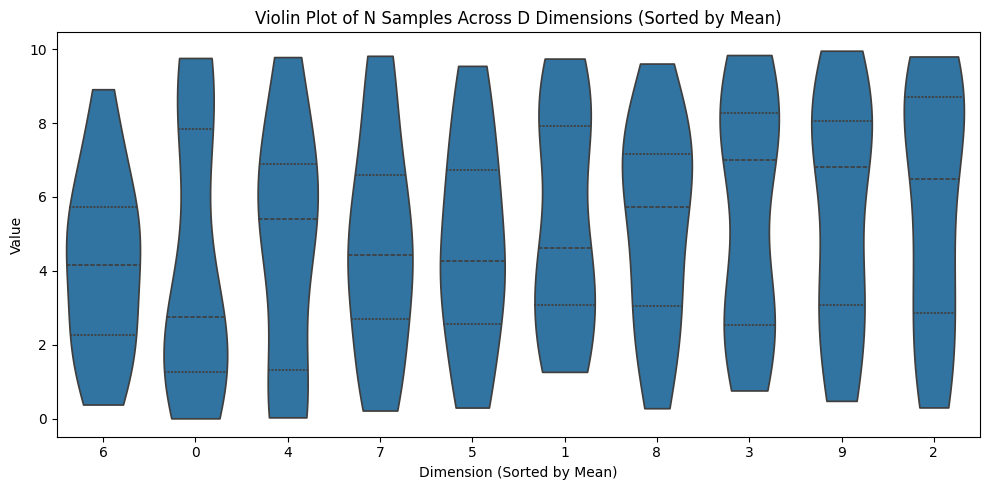

In [23]:
# import wandb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize W&B
# wandb.init(project="violin_plot_example")


# Create DataFrame
df = pd.DataFrame(data, columns=[f"{i}" for i in range(D)])

# Sort dimensions by mean value
mean_values = df.mean().sort_values()
sorted_df = df[mean_values.index]

# Convert to long-form for seaborn
df_long = sorted_df.melt(var_name="Dimension", value_name="Value")

# Plot violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x="Dimension", y="Value", data=df_long, inner="quartile", cut=0)

# Adjust plot for compactness
# plt.xticks(rotation=45)
plt.xlabel("Dimension (Sorted by Mean)")
plt.ylabel("Value")
plt.title("Violin Plot of N Samples Across D Dimensions (Sorted by Mean)")
plt.tight_layout()

# Log the plot to W&B
# wandb.log({"violin_plot": wandb.Image(plt)})

# wandb.finish()


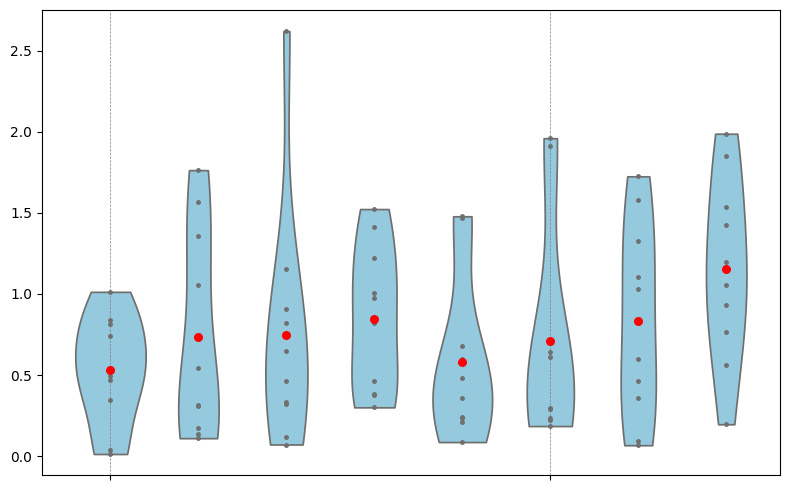

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Generate or load your data ---
# Suppose 'samples' has shape (N, D).
# Each column is one dimension, each row is one sample.
N, D = 10, 8
np.random.seed(42)
samples = np.abs(np.random.randn(N, D))  # Example: random nonnegative data

# --- 2. Convert data into a "long" pandas DataFrame for Seaborn ---
df = pd.DataFrame(samples, columns=[f"Dim {i}" for i in range(D)])
df_melt = df.melt(var_name="Dimension", value_name="Value")
# Now df_melt has columns: ["Dimension", "Value"], 
# where each dimension is repeated N times.

# --- 3. Create the violin plot ---
plt.figure(figsize=(8, 5))
sns.violinplot(x="Dimension", y="Value", data=df_melt, inner='points', color="skyblue", cut=0)

# --- 4. Compute statistics (min, max, mean) by dimension ---
stats = df_melt.groupby("Dimension")["Value"].agg(["min", "max", "mean"]).reset_index()

# # --- 5. Overlay min, max, and mean for each dimension ---
for i, row in stats.iterrows():
    # 'i' is the position of the dimension on the x-axis,
    # 'row' contains min, max, mean for that dimension
    # plt.scatter(i, row["min"],  color="black", marker="_",  s=100, zorder=3)
    # plt.scatter(i, row["max"],  color="black", marker="_",  s=100, zorder=3)
    plt.scatter(i, row["mean"], color="red",   marker="o",  s=30,  zorder=3)

# plt.title("Violin Plot per Dimension (with Min, Max, and Mean)")

# show a grid line every 5 dimensions
plt.xticks(ticks=np.arange(0, D, 5), labels=[f"" for i in range(0, D, 5)])
plt.grid(axis='x', which='major', color='gray', linestyle='--', linewidth=0.5)

# remove xlabel and ylabel
plt.xlabel("")
plt.ylabel("")

# remove surrounding white space
plt.tight_layout()
# plt.show()


